# Testing building an OnionNet (i.e. currently MultilayerNetwork) with multiple layers

Here we test various parameters to build the network, along with some visualisations too.

In [1]:
import lipinet.databases  # Import the module
import graph_tool as gt
import importlib

# Reload the module to ensure changes are picked up
importlib.reload(lipinet)

# Now you can use your function after reloading the module
from lipinet.databases import download_and_load_data, get_prior_knowledge
from lipinet.network import MultilayerNetwork
from lipinet.visualisation import set_node_sizes_and_text_by_depth

import pandas as pd
import numpy as np

import graph_tool
from graph_tool.all import graph_draw, bfs_iterator

In [2]:
# edges_data[:2]

In [3]:
# edges_data[2:]

In [4]:
# layer_edges_data

In [5]:
# import pandas as pd

# # Initialize the MultilayerNetwork
# network = MultilayerNetwork()

# # Define data for each layer according to the build_layer format
# # Layer 1: ChEBI compounds
# layer1_data = [
#     ('CHEBI:12345', 'Compound'),
#     ('CHEBI:54321', 'Compound'),
#     ('CHEBI:67890', 'Compound')
# ]
# layer1_custom_properties = {
#     'CHEBI:12345': {'extra_info': 'Basic Compound'},
#     'CHEBI:54321': {'extra_info': 'Special Compound'}
# }

# # Layer 2: ChEBI compound variants or other subset
# layer2_data = [
#     ('CHEBI:12345_variant', 'Compound Variant'),
#     ('CHEBI:54321_variant', 'Compound Variant'),
#     ('CHEBI:11111', 'Compound')
# ]
# layer2_custom_properties = {
#     'CHEBI:12345_variant': {'extra_info': 'Variant of CHEBI:12345'},
#     'CHEBI:54321_variant': {'extra_info': 'Variant of CHEBI:54321'}
# }

# # Layer 3: Rhea reactions
# layer3_data = [
#     ('RHEA:10000', 'Reaction'),
#     ('RHEA:20000', 'Reaction'),
#     ('RHEA:30000', 'Reaction')
# ]
# layer3_custom_properties = {
#     'RHEA:10000': {'reaction_type': 'synthesis'},
#     'RHEA:20000': {'reaction_type': 'degradation'}
# }

# # Build each layer using build_layer
# network.build_layer(layer1_data, "Layer1", "ChEBI", custom_properties=layer1_custom_properties)
# network.build_layer(layer2_data, "Layer2", "ChEBI", custom_properties=layer2_custom_properties)
# network.build_layer(layer3_data, "Layer3", "Rhea", custom_properties=layer3_custom_properties)

# # Define edges between nodes across layers directly
# edges_data = [
#     ('CHEBI:12345', 'CHEBI:12345_variant', 'variant', 1.0),
#     ('CHEBI:54321', 'CHEBI:54321_variant', 'variant', 1.0),
#     ('RHEA:10000', 'CHEBI:12345', 'reaction-participant', 2.0),
#     ('RHEA:20000', 'CHEBI:67890', 'reaction-participant', 2.5),
#     ('RHEA:30000', 'CHEBI:54321', 'reaction-participant', 2.0)
# ]

# layer_edges_data = edges_data[:2]
# # Add edges using add_edges_from_nodes method
# print([item[2] for item in layer_edges_data])
    
# network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
#                              to_nodes=[item[1] for item in layer_edges_data],
#                              from_layer='Layer1',
#                              to_layer='Layer2', #,
#                              edge_properties= {'edge_layertype':'interlayer', #variant
#                                                'edge_weight':1}
#                              #edge_properties= {'edge_type':[item[2] for item in layer_edges_data], 
#                              #                  'edge_weight':[item[3] for item in layer_edges_data]}
#                              )
# layer_edges_data = edges_data[2:]
# # Add edges using add_edges_from_nodes method
# network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
#                              to_nodes=[item[1] for item in layer_edges_data],
#                              from_layer='Layer3',
#                              to_layer='Layer1', #,
#                              edge_properties= {'edge_layertype':'interlayer', #reaction-participant
#                                                'edge_weight':2}
#                              #edge_properties= {'edge_type':[item[2] for item in layer_edges_data], 
#                              #                  'edge_weight':[item[3] for item in layer_edges_data]}
#                             )
# # for source, target, edge_type, edge_weight in edges_data:
# #     network.add_edges_from_nodes(source, target, from_layer='Layer1', to_layer='Layer2', edge_properties= {'edge_type':edge_type, 'edge_weight':edge_weight})

# # Print the edges for verification
# print("Edges in the network:")
# for edge in network.graph.edges():
#     source = network.graph.vertex_index[edge.source()]
#     target = network.graph.vertex_index[edge.target()]
#     edge_type = network.edge_layertype[edge]
#     edge_weight = network.edge_weight[edge]
#     print(f"Edge from {source} to {target}) - Type: {edge_type}, Weight: {edge_weight}")

# # Print nodes by layer to verify properties
# print("\nNodes in each layer:")
# for node_id, vertex in network.node_map.items():
#     print(f"Node {node_id}: Layer = {network.layer[vertex]}, Authority = {network.authority[vertex]}, Node LayerType = {network.node_type[vertex]}")

	•	Layer1: Red (1, 0, 0, 1) — RGB: (255, 0, 0)
	•	Layer2: Green (0, 1, 0, 1) — RGB: (0, 255, 0)
	•	Layer3: Blue (0, 0, 1, 1) — RGB: (0, 0, 255)

In [6]:
# from graph_tool.draw import graph_draw, prop_to_size
# from matplotlib import pyplot as plt

# # Map layers to colors
# color_map = {'Layer1': (1, 0, 0, 1), 'Layer2': (0, 1, 0, 1), 'Layer3': (0, 0, 1, 1)}
# layer_color = network.graph.new_vertex_property("vector<double>")
# for v in network.graph.vertices():
#     layer_color[v] = color_map[network.layer[v]]

# # Draw the graph with vertices colored by layer
# graph_draw(network.graph, vertex_fill_color=layer_color)
# plt.show()

In [7]:
# network.graph.edge_properties

Now try again, using our new functionality...

In [8]:
# import pandas as pd

# # Initialize the MultilayerNetwork
# network = MultilayerNetwork()

# # Define data for each layer according to the build_layer format
# # Layer 1: ChEBI compounds
# layer1_data = [
#     ('CHEBI:12345', 'Compound'),
#     ('CHEBI:54321', 'Compound'),
#     ('CHEBI:67890', 'Compound')
# ]
# layer1_custom_properties = {
#     'CHEBI:12345': {'extra_info': 'Basic Compound'},
#     'CHEBI:54321': {'extra_info': 'Special Compound'}
# }

# # Layer 2: ChEBI compound variants or other subset
# layer2_data = [
#     ('CHEBI:12345_variant', 'Compound Variant'),
#     ('CHEBI:54321_variant', 'Compound Variant'),
#     ('CHEBI:11111', 'Compound')
# ]
# layer2_custom_properties = {
#     'CHEBI:12345_variant': {'extra_info': 'Variant of CHEBI:12345'},
#     'CHEBI:54321_variant': {'extra_info': 'Variant of CHEBI:54321'}
# }

# # Layer 3: Rhea reactions
# layer3_data = [
#     ('RHEA:10000', 'Reaction'),
#     ('RHEA:20000', 'Reaction'),
#     ('RHEA:30000', 'Reaction')
# ]
# layer3_custom_properties = {
#     'RHEA:10000': {'reaction_type': 'synthesis'},
#     'RHEA:20000': {'reaction_type': 'degradation'}
# }

# # Build each layer using build_layer
# network.build_layer(layer1_data, "Layer1", "ChEBI", custom_properties=layer1_custom_properties)
# network.build_layer(layer2_data, "Layer2", "ChEBI", custom_properties=layer2_custom_properties)
# network.build_layer(layer3_data, "Layer3", "Rhea", custom_properties=layer3_custom_properties)

# # Define edges between nodes across layers directly
# edges_data = [
#     ('CHEBI:12345', 'CHEBI:12345_variant', 'variant', 1.0),
#     ('CHEBI:54321', 'CHEBI:54321_variant', 'variant', 1.0),
#     ('RHEA:10000', 'CHEBI:12345', 'reaction-participant', 2.0),
#     ('RHEA:20000', 'CHEBI:67890', 'reaction-participant', 2.5),
#     ('RHEA:30000', 'CHEBI:54321', 'reaction-participant', 2.0)
# ]

# layer_edges_data = edges_data[:2]
# # Add edges using add_edges_from_nodes method
# print([item[2] for item in layer_edges_data])
    
# network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
#                              to_nodes=[item[1] for item in layer_edges_data],
#                              from_layer='Layer1',
#                              to_layer='Layer2', #,
#                             #  edge_properties= {'edge_layertype':'interlayer', #variant
#                             #                    'edge_weight':1}
#                              edge_properties= {'edge_layertype':[item[2] for item in layer_edges_data], 
#                                               'edge_weight':[item[3] for item in layer_edges_data]}
#                              )
# layer_edges_data = edges_data[2:]
# # Add edges using add_edges_from_nodes method
# network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
#                              to_nodes=[item[1] for item in layer_edges_data],
#                              from_layer='Layer3',
#                              to_layer='Layer1', #,
#                             #  edge_properties= {'edge_layertype':'interlayer', #reaction-participant
#                             #                    'edge_weight':2}
#                              edge_properties= {'edge_layertype':[item[2] for item in layer_edges_data], 
#                                               'edge_weight':[item[3] for item in layer_edges_data]}
#                             )
# # for source, target, edge_type, edge_weight in edges_data:
# #     network.add_edges_from_nodes(source, target, from_layer='Layer1', to_layer='Layer2', edge_properties= {'edge_type':edge_type, 'edge_weight':edge_weight})

# # Print the edges for verification
# print("Edges in the network:")
# for edge in network.graph.edges():
#     source = network.graph.vertex_index[edge.source()]
#     target = network.graph.vertex_index[edge.target()]
#     edge_type = network.edge_layertype[edge]
#     edge_weight = network.edge_weight[edge]
#     print(f"Edge from {source} to {target}) - Type: {edge_type}, Weight: {edge_weight}")

# # Print nodes by layer to verify properties
# print("\nNodes in each layer:")
# for node_id, vertex in network.node_map.items():
#     print(f"Node {node_id}: Layer = {network.layer[vertex]}, Authority = {network.authority[vertex]}, Node LayerType = {network.node_type[vertex]}")

In [12]:
import pandas as pd
import numpy as np

data = {
    'Lipid class*': ['Class1|Class2', 'Class3', np.nan, 'Class4|Class5'],
    'Lipid ID': ['ID1|ID2', 'ID3', 'ID4', np.nan],
    'Source Attribute': ['High', 'Low', 'Medium', 'High'],
    'Target Attribute': ['Medium', 'High', 'Low', 'High'],
    'Weight': [1.5, 2.0, 1.2, 2.5],
    'Confidence': [0.95, 0.90, 0.85, 0.80]
}

df_swisslipids = pd.DataFrame(data)
df_swisslipids

,Lipid class*,Lipid ID,Source Attribute,Target Attribute,Weight,Confidence
0,Class1|Class2,ID1|ID2,High,Medium,1.5,0.95
1,Class3,ID3,Low,High,2.0,0.90
2,NaN,ID4,Medium,Low,1.2,0.85
3,Class4|Class5,NaN,High,High,2.5,0.80


In [13]:
df_swisslipids['layer'] = 'swisslipids'

In [14]:
network = MultilayerNetwork()

# Define which columns are edge properties and node properties
edge_property_cols = ['Weight', 'Confidence']
from_node_property_cols = ['Source Attribute']
to_node_property_cols = ['Target Attribute']

# Add edges from the DataFrame
network.add_edges_from_dataframe(
    df=df_swisslipids,
    from_col='Lipid class*',
    to_col='Lipid ID',
    from_layer_col='layer',
    to_layer_col='layer',
    edge_property_cols=edge_property_cols,
    from_node_property_cols=from_node_property_cols,
    to_node_property_cols=to_node_property_cols,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True,
    edge_property_mode='per-row'
)

Expanding the DataFrame to generate all edge combinations...
Expanding the DataFrame to generate all edge combinations...
Filtering out invalid rows...
Handling null or blank node IDs...
Identifying unique nodes from sources and targets...
Extracting node properties from the DataFrame...
Adding 6 missing nodes to the graph...
Added 6 missing nodes.
Preparing edge list...


KeyError: 'from_layer_col'

In [23]:
network = MultilayerNetwork()

# Define which columns are edge properties and node properties
edge_property_cols = ['Weight', 'Confidence']
from_node_property_cols = ['Source Attribute']
to_node_property_cols = ['Target Attribute']

# Add edges from the DataFrame
network.add_edges_from_dataframe(
    df=df_swisslipids,
    from_col='Lipid class*',
    to_col='Lipid ID',
    from_layer_col='layer',
    to_layer_col='layer',
    edge_property_cols=edge_property_cols,
    from_node_property_cols=from_node_property_cols,
    to_node_property_cols=to_node_property_cols,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True
)

ValueError: Required column 'layer' not found in DataFrame.

In [16]:
data = {
    'Lipid class*': ['Class1|Class2', 'Class3', np.nan, 'Class4|Class5'],
    'Lipid ID': ['ID1|ID2', 'ID3', 'ID4', np.nan],
    'Source Attribute': ['High', 'Low', 'Medium', 'High'],
    'Target Attribute': ['Medium', 'High', 'Low', 'High'],
    'Weight': [1.5, 2.0, 1.2, 2.5],
    'Confidence': [0.95, 0.90, 0.85, 0.80]
}

df_swisslipids = pd.DataFrame(data)
df_swisslipids

,Lipid class*,Lipid ID,Source Attribute,Target Attribute,Weight,Confidence
0,Class1|Class2,ID1|ID2,High,Medium,1.5,0.95
1,Class3,ID3,Low,High,2.0,0.90
2,NaN,ID4,Medium,Low,1.2,0.85
3,Class4|Class5,NaN,High,High,2.5,0.80


In [17]:
df_swisslipids['from_layer_col'] = 'swisslipids'
df_swisslipids['to_layer_col'] = 'swisslipids'

df_swisslipids

,Lipid class*,Lipid ID,Source Attribute,Target Attribute,Weight,Confidence,from_layer_col,to_layer_col
0,Class1|Class2,ID1|ID2,High,Medium,1.5,0.95,swisslipids,swisslipids
1,Class3,ID3,Low,High,2.0,0.90,swisslipids,swisslipids
2,NaN,ID4,Medium,Low,1.2,0.85,swisslipids,swisslipids
3,Class4|Class5,NaN,High,High,2.5,0.80,swisslipids,swisslipids


In [18]:
data = {
    'Lipid class*': ['Class1|Class2', 'Class3', np.nan, 'Class4|Class5'],
    'Lipid ID': ['ID1|ID2', 'ID3', 'ID4', np.nan],
    'Source Attribute': ['High', 'Low', 'Medium', 'High'],
    'Target Attribute': ['Medium', 'High', 'Low', 'High'],
    'Weight': [1.5, 2.0, 1.2, 2.5],
    'Confidence': [0.95, 0.90, 0.85, 0.80]
}

df_swisslipids = pd.DataFrame(data)
df_swisslipids

,Lipid class*,Lipid ID,Source Attribute,Target Attribute,Weight,Confidence
0,Class1|Class2,ID1|ID2,High,Medium,1.5,0.95
1,Class3,ID3,Low,High,2.0,0.90
2,NaN,ID4,Medium,Low,1.2,0.85
3,Class4|Class5,NaN,High,High,2.5,0.80


In [10]:
df_swisslipids['layer'] = 'swisslipids'

In [11]:
network = MultilayerNetwork()

# Define which columns are edge properties and node properties
edge_property_cols = ['Weight', 'Confidence']
from_node_property_cols = ['Source Attribute']
to_node_property_cols = ['Target Attribute']

# Add edges from the DataFrame
network.add_edges_from_dataframe(
    df=df_swisslipids,
    from_col='Lipid class*',
    to_col='Lipid ID',
    from_layer_col='from_layer_col',
    to_layer_col='from_layer_col',
    edge_property_cols=edge_property_cols,
    from_node_property_cols=from_node_property_cols,
    to_node_property_cols=to_node_property_cols,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True,
    edge_property_mode='per-row'
)

Expanding the DataFrame to generate all edge combinations...
Expanding the DataFrame to generate all edge combinations...
Filtering out invalid rows...
Handling null or blank node IDs...
Identifying unique nodes from sources and targets...
Extracting node properties from the DataFrame...
Adding 6 missing nodes to the graph...
Added 6 missing nodes.
Preparing edge list...
Mapping node keys to vertex indices...
Preparing to add 5 edges...
Adding edges in bulk...
add_edge_list returned None. No edges were added.
Assigning edge properties in bulk...
Edge addition complete.


In [20]:
network.graph

<Graph object, directed, with 6 vertices and 5 edges, 4 internal vertex properties, 2 internal edge properties, at 0x3053e9b80>

In [21]:
# network.graph.properties

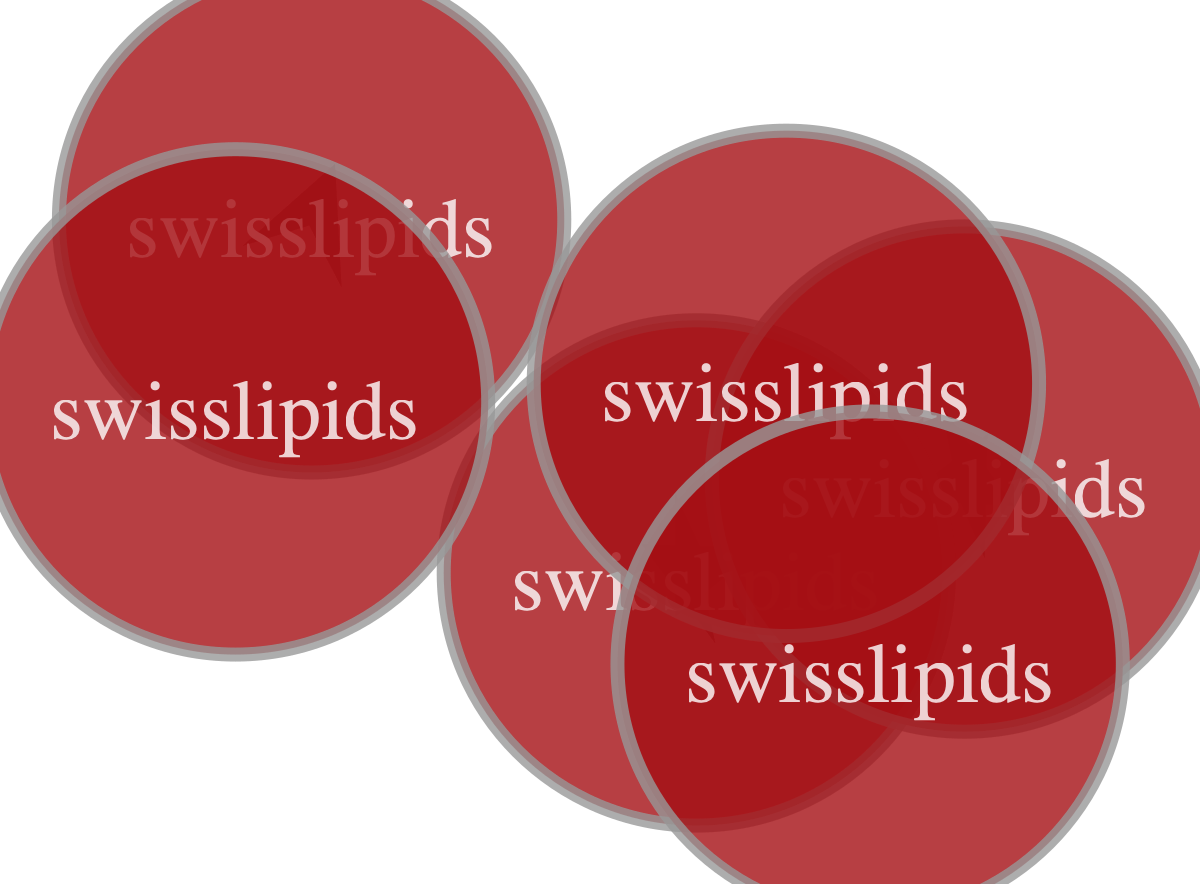

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x3053e9b80, at 0x17f84af00>

In [23]:
graph_draw(network.graph, vertex_text=network.graph.vp['layer'])

Now trying an even more advanced example

In [19]:
# Define the data for the DataFrame
data = {
    'from_col': [
        'A1',            # Row 0: Single source node
        'A2',            # Row 1: Single source node
        'B1',            # Row 2: Single source node
        'C1',            # Row 3: Single source node
        'B2',            # Row 4: Single source node
        'A3',            # Row 5: Single source node
        'C3',            # Row 6: Single source node
        np.nan,          # Row 7: Missing source node
        'A4',            # Row 8: Single source node
        123              # Row 9: Invalid source node (non-string)
    ],
    'to_col': [
        'A2|A3',         # Row 0: Multiple target nodes within Layer A
        'B1',            # Row 1: Single target node in Layer B
        'C1|C2',         # Row 2: Multiple target nodes in Layer C
        'C3',            # Row 3: Single target node within Layer C
        'A1|A3',         # Row 4: Multiple target nodes in Layer A
        'C2',            # Row 5: Single target node in Layer C
        'B1',            # Row 6: Single target node in Layer B
        'C4',            # Row 7: Single target node in Layer C (source missing)
        np.nan,          # Row 8: Missing target node
        'B2'             # Row 9: Single target node in Layer B (invalid source)
    ],
    'from_layer_col': [
        'LayerA',        # Row 0
        'LayerA',        # Row 1
        'LayerB',        # Row 2
        'LayerC',        # Row 3
        'LayerB',        # Row 4
        'LayerA',        # Row 5
        'LayerC',        # Row 6
        'LayerA',        # Row 7 (source missing)
        'LayerB',        # Row 8
        'LayerC'         # Row 9 (invalid source)
    ],
    'to_layer_col': [
        'LayerA',        # Row 0
        'LayerB',        # Row 1
        'LayerC',        # Row 2
        'LayerC',        # Row 3
        'LayerA',        # Row 4
        'LayerC',        # Row 5
        'LayerB',        # Row 6
        'LayerC',        # Row 7 (source missing)
        'LayerB',        # Row 8
        'LayerB'         # Row 9 (invalid source)
    ],
    'Source Attribute': [
        'Active',        # Row 0
        'Inactive',      # Row 1
        'High',          # Row 2
        'Low',           # Row 3
        'Medium',        # Row 4
        'Active',        # Row 5
        'Critical',      # Row 6
        'Unknown',       # Row 7 (source missing)
        'Active',        # Row 8
        'Low'            # Row 9 (invalid source)
    ],
    'Target Attribute': [
        'Medium',        # Row 0
        'High',          # Row 1
        'Low',           # Row 2
        'Critical',      # Row 3
        'Active',        # Row 4
        'Medium',        # Row 5
        'High',          # Row 6
        'Low',           # Row 7 (source missing)
        'High',          # Row 8
        'Medium'         # Row 9 (invalid source)
    ],
    'Weight': [
        1.5,             # Row 0
        2.0,             # Row 1
        1.2,             # Row 2
        2.5,             # Row 3
        1.8,             # Row 4
        2.2,             # Row 5
        1.0,             # Row 6
        1.5,             # Row 7 (source missing)
        2.0,             # Row 8
        1.3              # Row 9 (invalid source)
    ],
    'Confidence': [
        0.95,            # Row 0
        0.90,            # Row 1
        0.85,            # Row 2
        0.80,            # Row 3
        0.88,            # Row 4
        0.92,            # Row 5
        0.75,            # Row 6
        0.80,            # Row 7 (source missing)
        0.85,            # Row 8
        0.78             # Row 9 (invalid source)
    ]
}

# Create the DataFrame
df_complex = pd.DataFrame(data)
df_complex

,from_col,to_col,from_layer_col,to_layer_col,Source Attribute,Target Attribute,Weight,Confidence
0,A1,A2|A3,LayerA,LayerA,Active,Medium,1.5,0.95
1,A2,B1,LayerA,LayerB,Inactive,High,2.0,0.90
2,B1,C1|C2,LayerB,LayerC,High,Low,1.2,0.85
3,C1,C3,LayerC,LayerC,Low,Critical,2.5,0.80
4,B2,A1|A3,LayerB,LayerA,Medium,Active,1.8,0.88
5,A3,C2,LayerA,LayerC,Active,Medium,2.2,0.92
6,C3,B1,LayerC,LayerB,Critical,High,1.0,0.75
7,NaN,C4,LayerA,LayerC,Unknown,Low,1.5,0.80
8,A4,NaN,LayerB,LayerB,Active,High,2.0,0.85
9,123,B2,LayerC,LayerB,Low,Medium,1.3,0.78


In [20]:
# Define which columns are edge properties and node properties
edge_property_cols = ['Weight', 'Confidence']
from_node_property_cols = ['Source Attribute']
to_node_property_cols = ['Target Attribute']

# Initialize your network (assuming the MultilayerNetwork class is already defined and instantiated as 'network')
network = MultilayerNetwork()

# Add edges from the DataFrame with 'per-row' property mode to handle property list mismatches gracefully
network.add_edges_from_dataframe(
    df=df_complex,
    from_col='from_col',
    to_col='to_col',
    from_layer=None,  # Using from_layer_col for variable layers
    to_layer=None,    # Using to_layer_col for variable layers
    from_layer_col='from_layer_col',
    to_layer_col='to_layer_col',
    edge_property_cols=edge_property_cols,
    from_node_property_cols=from_node_property_cols,
    to_node_property_cols=to_node_property_cols,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True,
    edge_property_mode='per-row'  # Choose 'per-edge' or 'per-row' based on your preference
)

Expanding the DataFrame to generate all edge combinations...
Filtering out invalid rows...
Adding 8 missing nodes to the graph...
Added 8 missing nodes.
Adding edges in bulk...
Preparing to add 10 edges...
add_edge_list returned None. No edges were added.
Edge addition complete.


In [21]:
network.graph

<Graph object, directed, with 8 vertices and 10 edges, 12 internal vertex properties, 10 internal edge properties, at 0x17600b500>

In [22]:
# network.graph.properties

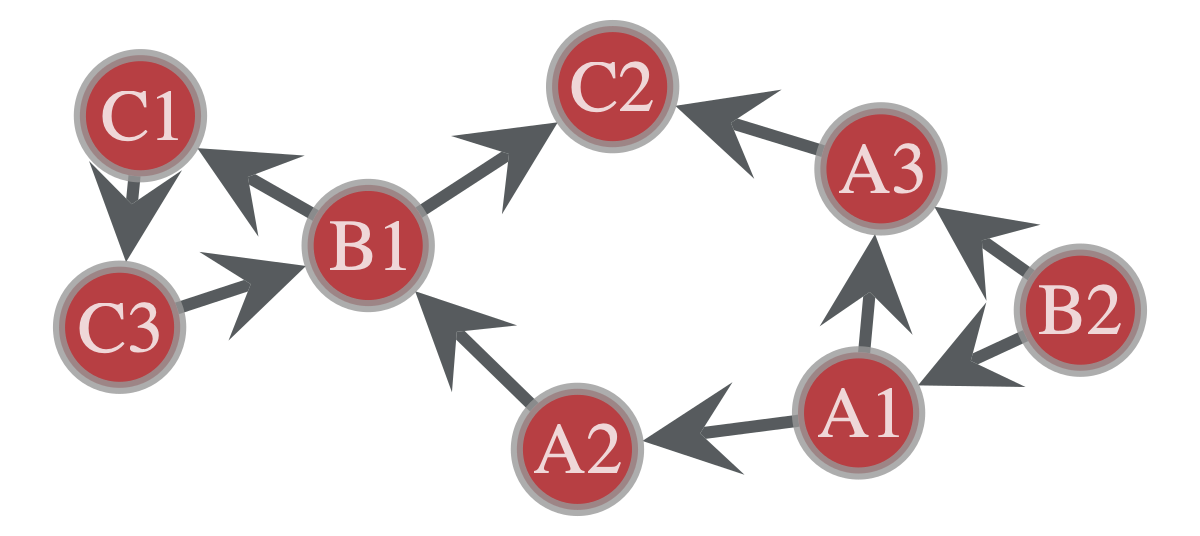

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17600b500, at 0x176000800>

In [23]:
graph_draw(network.graph, vertex_text=network.graph.vp['node_id'])

In [24]:
df_complex

,from_col,to_col,from_layer_col,to_layer_col,Source Attribute,Target Attribute,Weight,Confidence
0,A1,A2|A3,LayerA,LayerA,Active,Medium,1.5,0.95
1,A2,B1,LayerA,LayerB,Inactive,High,2.0,0.90
2,B1,C1|C2,LayerB,LayerC,High,Low,1.2,0.85
3,C1,C3,LayerC,LayerC,Low,Critical,2.5,0.80
4,B2,A1|A3,LayerB,LayerA,Medium,Active,1.8,0.88
5,A3,C2,LayerA,LayerC,Active,Medium,2.2,0.92
6,C3,B1,LayerC,LayerB,Critical,High,1.0,0.75
7,NaN,C4,LayerA,LayerC,Unknown,Low,1.5,0.80
8,A4,NaN,LayerB,LayerB,Active,High,2.0,0.85
9,123,B2,LayerC,LayerB,Low,Medium,1.3,0.78


In [15]:
network.graph

<Graph object, directed, with 8 vertices and 10 edges, 6 internal vertex properties, 4 internal edge properties, at 0x173dbb7a0>

In [24]:
# network.graph.properties

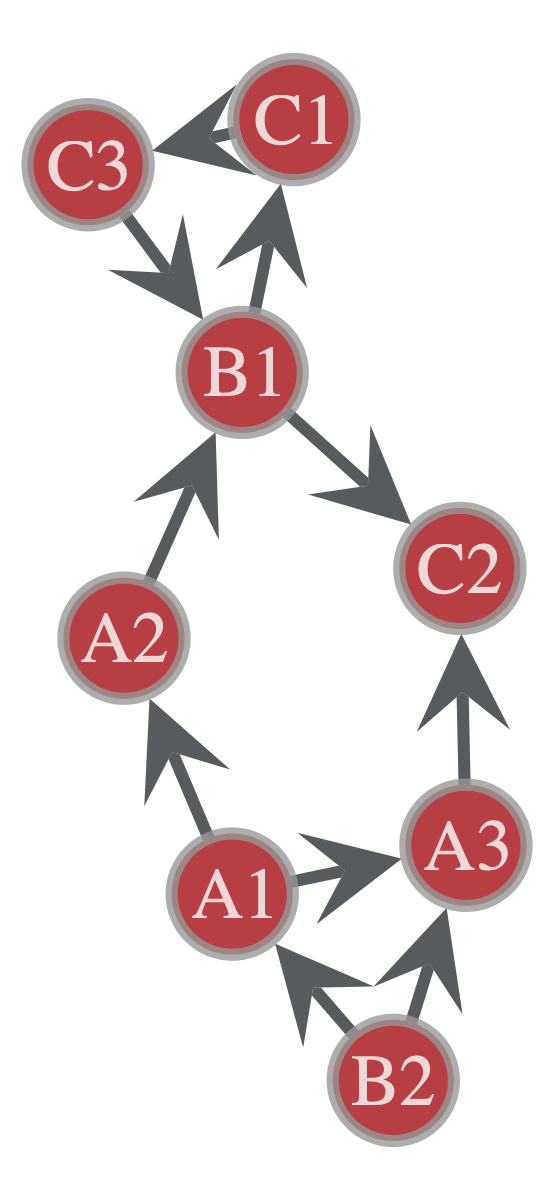

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x173dbb7a0, at 0x16affab10>

In [25]:
graph_draw(network.graph, vertex_text=network.graph.vp['node_id'])

In [26]:
df_complex

,from_col,to_col,from_layer_col,to_layer_col,Source Attribute,Target Attribute,Weight,Confidence
0,A1,A2|A3,LayerA,LayerA,Active,Medium,1.5,0.95
1,A2,B1,LayerA,LayerB,Inactive,High,2.0,0.90
2,B1,C1|C2,LayerB,LayerC,High,Low,1.2,0.85
3,C1,C3,LayerC,LayerC,Low,Critical,2.5,0.80
4,B2,A1|A3,LayerB,LayerA,Medium,Active,1.8,0.88
5,A3,C2,LayerA,LayerC,Active,Medium,2.2,0.92
6,C3,B1,LayerC,LayerB,Critical,High,1.0,0.75
7,NaN,C4,LayerA,LayerC,Unknown,Low,1.5,0.80
8,A4,NaN,LayerB,LayerB,Active,High,2.0,0.85
9,123,B2,LayerC,LayerB,Low,Medium,1.3,0.78


Let's also prepare for some visualisation

In [27]:
list(network.graph.vertex_properties)

['layer',
 'authority',
 'node_type',
 'node_id',
 'Source Attribute',
 'Target Attribute']

In [25]:
# Sample DataFrame with layers as columns in the DataFrame
df_edges = pd.DataFrame({
    'from_node': ['A|X', 'C', 'E'],
    'to_node': ['B', 'D|Y|Z', 'F'],
    'from_layer': ['layer1', 'layer1', 'layer1'],
    'to_layer': ['layer2', 'layer2', 'layer2'],
    'edge_type': ['activation', 'inhibition', 'modulation'],
    'edge_weight': [1.0, 0.5, 0.75]
})

df_edges

TypeError: MultilayerNetwork.add_edges_from_dataframe() got an unexpected keyword argument 'property_cols'

In [26]:
# Add edges from the DataFrame with 'per-row' property mode to handle property list mismatches gracefully
network.add_edges_from_dataframe(
    df=df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer=None,  # Using from_layer_col for variable layers
    to_layer=None,    # Using to_layer_col for variable layers
    from_layer_col='from_layer',
    to_layer_col='to_layer',
    edge_property_cols=['edge_type','edge_weight'],
    from_node_property_cols=None,
    to_node_property_cols=None,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True,
    edge_property_mode='per-row'  # Choose 'per-edge' or 'per-row' based on your preference
)

TypeError: MultilayerNetwork.add_edges_from_dataframe() got an unexpected keyword argument 'property_cols'

In [27]:
network.graph

TypeError: MultilayerNetwork.add_edges_from_dataframe() got an unexpected keyword argument 'property_cols'

Now for a more realistic example

In [47]:
network = MultilayerNetwork()

In [48]:
# Creating the DataFrame with realistic and complex edge data
df_edges = pd.DataFrame({
    'from_node': ['GeneA|GeneB', 'ProteinX', 'MetaboliteY', 'GeneC', 'GeneD|GeneE'],
    'to_node': ['ProteinX|ProteinY', 'MetaboliteY', 'MetaboliteZ', 'GeneD', 'ProteinZ'],
    'from_layer': ['genes', 'proteins', 'metabolites', 'genes', 'genes'],
    'to_layer': ['proteins', 'metabolites', 'metabolites', 'genes', 'proteins'],
    'edge_type': ['activation', 'inhibition', 'conversion', 'binding', 'modulation'],
    'edge_weight': [0.9, 0.5, 1.0, 0.3, 0.75],
    'confidence_score': [0.95, 0.85, 0.99, 0.6, 0.8]
})

# Display the DataFrame for reference
display(df_edges)

,from_node,to_node,from_layer,to_layer,edge_type,edge_weight,confidence_score
0,GeneA|GeneB,ProteinX|ProteinY,genes,proteins,activation,0.90,0.95
1,ProteinX,MetaboliteY,proteins,metabolites,inhibition,0.50,0.85
2,MetaboliteY,MetaboliteZ,metabolites,metabolites,conversion,1.00,0.99
3,GeneC,GeneD,genes,genes,binding,0.30,0.60
4,GeneD|GeneE,ProteinZ,genes,proteins,modulation,0.75,0.80


In [49]:
# Add edges from the DataFrame with 'per-row' property mode to handle property list mismatches gracefully
network.add_edges_from_dataframe(
    df=df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer=None,  # Using from_layer_col for variable layers
    to_layer=None,    # Using to_layer_col for variable layers
    from_layer_col='from_layer',
    to_layer_col='to_layer',
    edge_property_cols=['edge_type','edge_weight', 'confidence_score'],
    from_node_property_cols=None,
    to_node_property_cols=None,
    split_char='|',
    create_missing=True,
    skip_if_duplicate='exact',
    verbose=True,
    edge_property_mode='per-row'  # Choose 'per-edge' or 'per-row' based on your preference
)

Node ('genes', 'GeneA') not found. Creating node.
Node GeneA: {'layer': 'genes', 'node_id': 'GeneA'}
Node ('proteins', 'ProteinX') not found. Creating node.
Node ProteinX: {'layer': 'proteins', 'node_id': 'ProteinX'}
Edge added from GeneA (genes) to ProteinX (proteins) with properties: {'edge_type': 'activation', 'edge_weight': 0.9, 'confidence_score': 0.95}
Node GeneA: {'layer': 'genes', 'node_id': 'GeneA'}
Node ('proteins', 'ProteinY') not found. Creating node.
Node ProteinY: {'layer': 'proteins', 'node_id': 'ProteinY'}
Edge added from GeneA (genes) to ProteinY (proteins) with properties: {'edge_type': 'activation', 'edge_weight': 0.9, 'confidence_score': 0.95}
Node ('genes', 'GeneB') not found. Creating node.
Node GeneB: {'layer': 'genes', 'node_id': 'GeneB'}
Node ProteinX: {'layer': 'proteins', 'node_id': 'ProteinX'}
Edge added from GeneB (genes) to ProteinX (proteins) with properties: {'edge_type': 'activation', 'edge_weight': 0.9, 'confidence_score': 0.95}
Node GeneB: {'layer': '

In [50]:
list(network.node_map)

[('genes', 'GeneA'),
 ('proteins', 'ProteinX'),
 ('proteins', 'ProteinY'),
 ('genes', 'GeneB'),
 ('metabolites', 'MetaboliteY'),
 ('metabolites', 'MetaboliteZ'),
 ('genes', 'GeneC'),
 ('genes', 'GeneD'),
 ('proteins', 'ProteinZ'),
 ('genes', 'GeneE')]

In [51]:
network.graph.properties

{('v',
  'layer'): <VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x178c3fe60>,
 ('v',
  'authority'): <VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x179800c20>,
 ('v',
  'node_type'): <VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x179801dc0>,
 ('v',
  'node_id'): <VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x1798010a0>,
 ('e',
  'weight'): <EdgePropertyMap object with value type 'double', for Graph 0x178727980, at 0x1798036e0>,
 ('e',
  'edge_layertype'): <EdgePropertyMap object with value type 'string', for Graph 0x178727980, at 0x179801040>,
 ('e',
  'edge_type'): <EdgePropertyMap object with value type 'string', for Graph 0x178727980, at 0x179803410>,
 ('e',
  'edge_weight'): <EdgePropertyMap object with value type 'double', for Graph 0x178727980, at 0x1798026c0>,
 ('e',
  'confidence_score'): <EdgePropertyMap object with value type 'double', for Graph 

In [52]:
list(network.graph.vp['node_id'])

['GeneA',
 'ProteinX',
 'ProteinY',
 'GeneB',
 'MetaboliteY',
 'MetaboliteZ',
 'GeneC',
 'GeneD',
 'ProteinZ',
 'GeneE']

In [53]:
# Iterate over all edges and print their properties for verification
for edge in network.graph.edges():
    source = network.graph.vertex_index[edge.source()]
    target = network.graph.vertex_index[edge.target()]
    source_id = list(network.graph.vp['node_id'])[source]
    target_id = list(network.graph.vp['node_id'])[target]
    source_layer = list(network.graph.vp['layer'])[source]
    target_layer = list(network.graph.vp['layer'])[target]
    print(f"Edge from node {source} {source_id, source_layer} to node {target} {target_id, target_layer}:")
    print(f"  Type: {network.graph.edge_properties['edge_type'][edge]}")
    print(f"  Weight: {network.graph.edge_properties['edge_weight'][edge]}")
    print(f"  Confidence Score: {network.graph.edge_properties['confidence_score'][edge]}")

Edge from node 0 ('GeneA', 'genes') to node 1 ('ProteinX', 'proteins'):
  Type: activation
  Weight: 0.9
  Confidence Score: 0.95
Edge from node 0 ('GeneA', 'genes') to node 2 ('ProteinY', 'proteins'):
  Type: activation
  Weight: 0.9
  Confidence Score: 0.95
Edge from node 1 ('ProteinX', 'proteins') to node 4 ('MetaboliteY', 'metabolites'):
  Type: inhibition
  Weight: 0.5
  Confidence Score: 0.85
Edge from node 3 ('GeneB', 'genes') to node 1 ('ProteinX', 'proteins'):
  Type: activation
  Weight: 0.9
  Confidence Score: 0.95
Edge from node 3 ('GeneB', 'genes') to node 2 ('ProteinY', 'proteins'):
  Type: activation
  Weight: 0.9
  Confidence Score: 0.95
Edge from node 4 ('MetaboliteY', 'metabolites') to node 5 ('MetaboliteZ', 'metabolites'):
  Type: conversion
  Weight: 1.0
  Confidence Score: 0.99
Edge from node 6 ('GeneC', 'genes') to node 7 ('GeneD', 'genes'):
  Type: binding
  Weight: 0.3
  Confidence Score: 0.6
Edge from node 7 ('GeneD', 'genes') to node 8 ('ProteinZ', 'proteins')

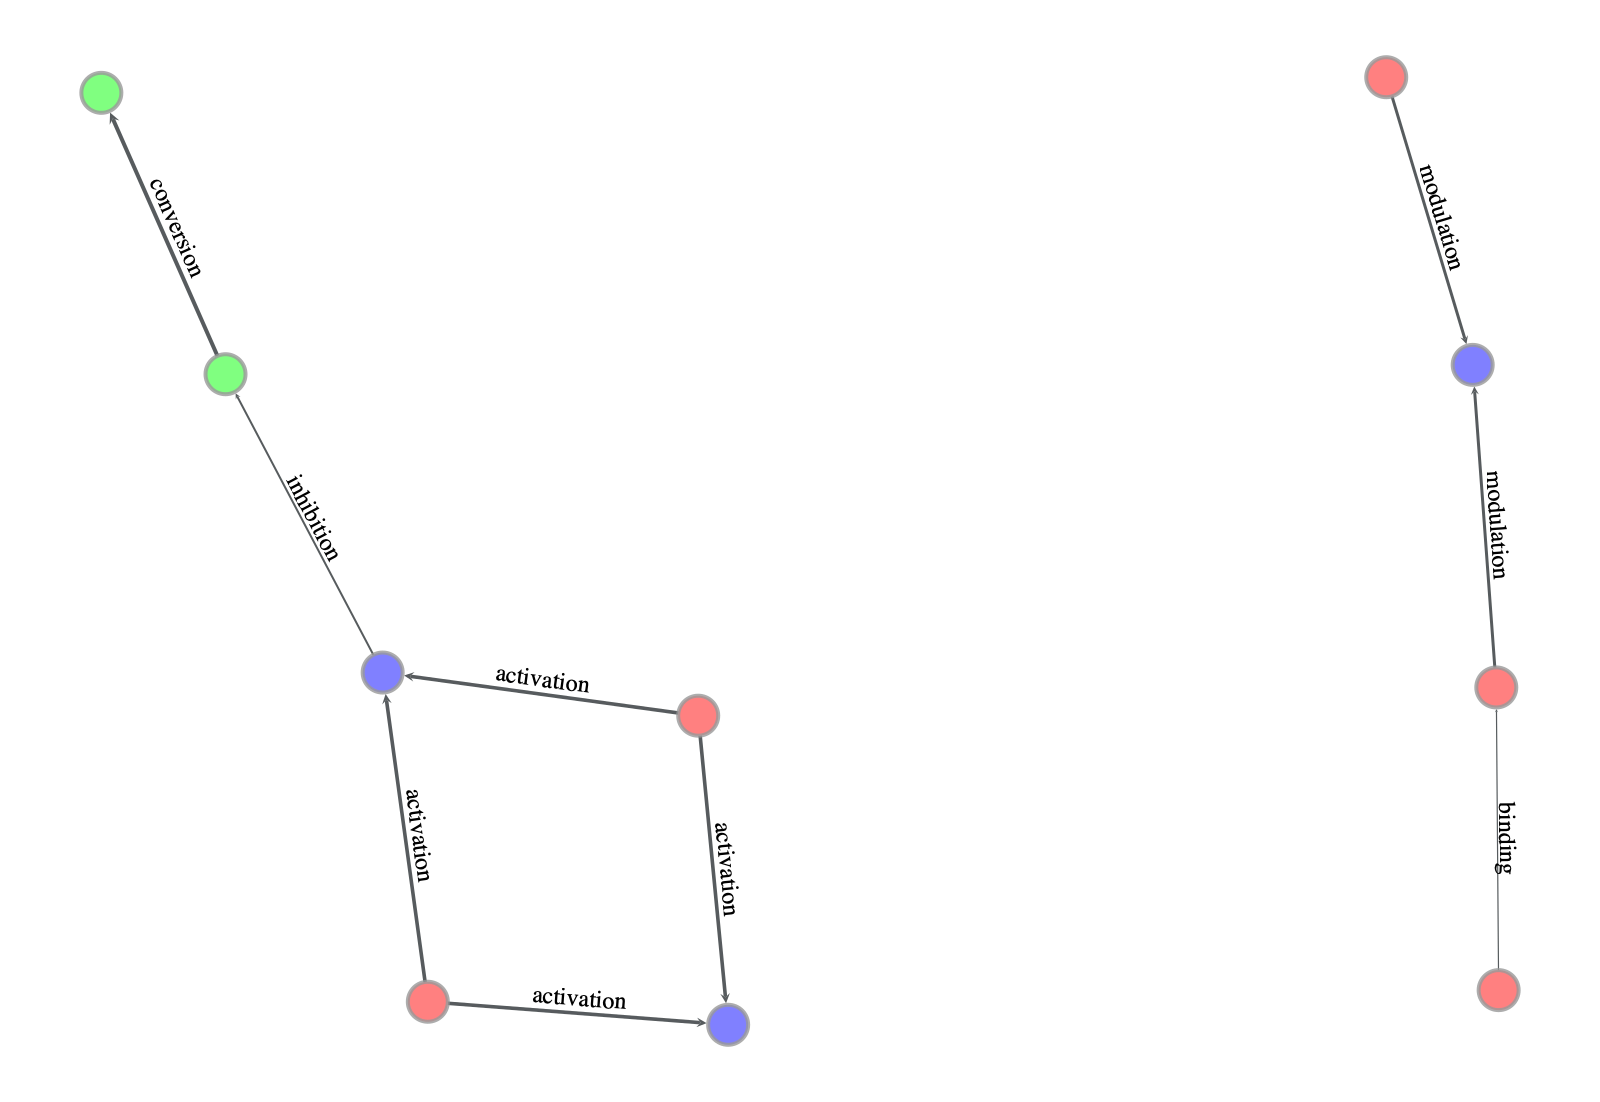

<Figure size 1200x1200 with 0 Axes>

In [54]:
import graph_tool.all as gt
import matplotlib.pyplot as plt

# Create a color map for layers
layer_colors = {
    'genes': (1, 0.5, 0.5, 1),        # light red
    'proteins': (0.5, 0.5, 1, 1),     # light blue
    'metabolites': (0.5, 1, 0.5, 1)   # light green
}

# Create property maps for colors, sizes, and labels
vertex_color = network.graph.new_vertex_property("vector<double>")
vertex_size = network.graph.new_vertex_property("double")
edge_text = network.graph.new_edge_property("string")
edge_width = network.graph.new_edge_property("double")

# Assign colors and sizes based on layer and edge properties
for v in network.graph.vertices():
    layer = network.graph.vp['layer'][v]  # assuming nodes have 'layer' property
    vertex_color[v] = layer_colors.get(layer, (0.7, 0.7, 0.7, 1))  # default grey if layer not found
    vertex_size[v] = 20  # Set a default size; adjust as needed

for e in network.graph.edges():
    edge_type = network.graph.ep['edge_type'][e]
    edge_weight = network.graph.ep['edge_weight'][e]
    edge_text[e] = edge_type  # Use edge_type as label
    edge_width[e] = edge_weight * 2  # Scale edge width by weight

# Layout the graph
pos = gt.sfdp_layout(network.graph)

# Draw the graph
plt.figure(figsize=(12, 12))
gt.graph_draw(
    network.graph,
    pos=pos,
    vertex_fill_color=vertex_color,
    vertex_size=vertex_size,
    edge_pen_width=edge_width,
    edge_text=edge_text,
    output_size=(800, 800)#,
    #output="network_plot.png"
)
plt.show()

	•	Layer1: Red (1, 0, 0, 1) — RGB: (255, 0, 0)
	•	Layer2: Green (0, 1, 0, 1) — RGB: (0, 255, 0)
	•	Layer3: Blue (0, 0, 1, 1) — RGB: (0, 0, 255)

More sophisticated multi-layer visualisations

In [55]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Initialize NetworkX graph to build with PyVis
G = nx.MultiDiGraph()  # Directed multigraph to allow multiple edges

# Layer-specific node colors
layer_colors = {
    'genes': 'red',
    'proteins': 'blue',
    'metabolites': 'green'
}

# Add nodes and edges from DataFrame to NetworkX graph
for _, row in df_edges.iterrows():
    # Split multi-ID nodes
    from_nodes = row['from_node'].split('|')
    to_nodes = row['to_node'].split('|')
    from_layer = row['from_layer']
    to_layer = row['to_layer']
    
    # Add nodes with layer-based coloring
    for from_node in from_nodes:
        G.add_node(from_node, layer=from_layer, color=layer_colors.get(from_layer, 'grey'))
    for to_node in to_nodes:
        G.add_node(to_node, layer=to_layer, color=layer_colors.get(to_layer, 'grey'))
        
    # Add edges with properties
    for from_node in from_nodes:
        for to_node in to_nodes:
            G.add_edge(
                from_node, to_node,
                edge_type=row['edge_type'],
                edge_weight=row['edge_weight'],
                confidence_score=row['confidence_score']
            )

# Initialize PyVis network
net = Network(height='800px', width='100%', directed=True)

# Populate PyVis network with NetworkX graph data
net.from_nx(G)

# Customize appearance in PyVis
for node in net.nodes:
    layer = G.nodes[node['id']].get('layer')
    node['title'] = f"Layer: {layer}"
    node['color'] = layer_colors.get(layer, 'grey')
    node['size'] = 15  # Size of each node

for edge in net.edges:
    edge['title'] = f"Type: {edge['edge_type']}<br>Weight: {edge['edge_weight']}<br>Confidence: {edge['confidence_score']}"
    edge['width'] = edge['edge_weight'] * 2  # Scale edge width by weight
    edge['color'] = 'grey' if edge['confidence_score'] < 0.8 else 'black'

# Save and display the network
net.show('multilayer_network.html')

In [56]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd

# Sample data similar to your use case
df_edges = pd.DataFrame({
    'from_node': ['GeneA', 'GeneB', 'ProteinX', 'MetaboliteY', 'GeneC', 'GeneD', 'GeneG', 'ProteinA'],
    'to_node': ['ProteinX', 'ProteinY', 'MetaboliteZ', 'ProteinW', 'GeneD', 'ProteinZ', 'ProteinB', 'MetaboliteA'],
    'from_layer': ['Genomics', 'Genomics', 'Proteomics', 'Metabolomics', 'Genomics', 'Genomics', 'Genomics', 'Proteomics'],
    'to_layer': ['Proteomics', 'Proteomics', 'Metabolomics', 'Proteomics', 'Genomics', 'Proteomics', 'Proteomics', 'Metabolomics'],
    'edge_type': ['activation', 'inhibition', 'conversion', 'binding', 'binding', 'modulation', 'activation', 'transport'],
    'edge_weight': [0.9, 0.7, 1.0, 0.3, 0.4, 0.75, 0.8, 0.65]
})

# Define z-layer for each layer
layer_positions = {'Genomics': 0, 'Proteomics': 1, 'Metabolomics': 2}
layer_colors = {'Genomics': 'red', 'Proteomics': 'blue', 'Metabolomics': 'green'}

# Create a NetworkX graph and add nodes and edges
G = nx.DiGraph()
for _, row in df_edges.iterrows():
    from_node = row['from_node']
    to_node = row['to_node']
    from_layer = row['from_layer']
    to_layer = row['to_layer']
    
    G.add_node(from_node, layer=from_layer, color=layer_colors[from_layer], pos=(0, 0, layer_positions[from_layer]))
    G.add_node(to_node, layer=to_layer, color=layer_colors[to_layer], pos=(0, 0, layer_positions[to_layer]))
    
    G.add_edge(from_node, to_node, weight=row['edge_weight'], type=row['edge_type'])

# Define 3D positions for nodes
node_positions = {node: (i, 0, layer_positions[G.nodes[node]['layer']]) for i, node in enumerate(G.nodes)}

# Prepare Plotly data for edges
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = node_positions[edge[0]]
    x1, y1, z1 = node_positions[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

# Prepare Plotly data for nodes
node_x = [node_positions[node][0] for node in G.nodes]
node_y = [node_positions[node][1] for node in G.nodes]
node_z = [node_positions[node][2] for node in G.nodes]
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Plot with Plotly
fig = go.Figure()

# Add edges
fig.add_trace(go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                           mode='lines',
                           line=dict(color='grey', width=1),
                           hoverinfo='none'))

# Add nodes
fig.add_trace(go.Scatter3d(x=node_x, y=node_y, z=node_z,
                           mode='markers+text',
                           marker=dict(size=8, color=node_colors),
                           text=list(G.nodes),
                           textposition="top center"))

# Add layer planes using Mesh3d for visual separation
for layer, z in layer_positions.items():
    fig.add_trace(go.Mesh3d(
        x=[-1, len(G.nodes), len(G.nodes), -1],  # X-coordinates of the vertices
        y=[-1, -1, 1, 1],                       # Y-coordinates of the vertices
        z=[z, z, z, z],                         # Z-coordinate is constant for each layer
        color=layer_colors[layer],
        opacity=0.1,
        hoverinfo='none'
    ))

# Set plot settings
fig.update_layout(scene=dict(
                    xaxis=dict(showbackground=False),
                    yaxis=dict(showbackground=False),
                    zaxis=dict(showbackground=False),
                    ),
                  title="Multilayer Network in 3D with Layers",
                  showlegend=False)

fig.show()

In [57]:
import networkx as nx
import plotly.graph_objects as go

def plot_multilayer_network(df, from_col, to_col, from_layer_col, to_layer_col, property_cols=None, layer_positions=None, layer_colors=None, split_char='|'):
    """
    Plots a 3D multilayer network from a DataFrame with customizable layers and properties.
    
    Args:
    - df: DataFrame containing the network edges.
    - from_col: Column name in `df` for source node IDs.
    - to_col: Column name in `df` for target node IDs.
    - from_layer_col: Column name in `df` specifying source node layers.
    - to_layer_col: Column name in `df` specifying target node layers.
    - property_cols: Optional; list of column names in `df` to be used as edge properties.
    - layer_positions: Dictionary specifying the z-coordinate for each layer (e.g., {'Genomics': 0, 'Proteomics': 1}).
    - layer_colors: Dictionary specifying the color for each layer (e.g., {'Genomics': 'red', 'Proteomics': 'blue'}).
    - split_char: Character used to split multiple node IDs within a single cell in `from_col` and `to_col`.
    
    Returns:
    - A Plotly figure with the 3D network visualization.
    """
    # Default properties if not provided
    if layer_positions is None:
        layer_positions = {layer: idx for idx, layer in enumerate(df[from_layer_col].unique())}
    if layer_colors is None:
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
        layer_colors = {layer: colors[idx % len(colors)] for idx, layer in enumerate(df[from_layer_col].unique())}
    
    # Initialize NetworkX graph
    G = nx.DiGraph()

    # Add nodes and edges based on DataFrame
    for _, row in df.iterrows():
        from_nodes = row[from_col].split(split_char)
        to_nodes = row[to_col].split(split_char)
        from_layer = row[from_layer_col]
        to_layer = row[to_layer_col]
        
        for from_node in from_nodes:
            G.add_node(from_node, layer=from_layer, color=layer_colors.get(from_layer, 'grey'), pos=(0, 0, layer_positions[from_layer]))
        for to_node in to_nodes:
            G.add_node(to_node, layer=to_layer, color=layer_colors.get(to_layer, 'grey'), pos=(0, 0, layer_positions[to_layer]))
        
        for from_node in from_nodes:
            for to_node in to_nodes:
                edge_props = {prop: row[prop] for prop in property_cols} if property_cols else {}
                G.add_edge(from_node, to_node, **edge_props)
    
    # Define 3D positions for nodes
    node_positions = {node: (i, 0, layer_positions[G.nodes[node]['layer']]) for i, node in enumerate(G.nodes)}

    # Prepare Plotly data for edges
    edge_x, edge_y, edge_z = [], [], []
    for edge in G.edges():
        x0, y0, z0 = node_positions[edge[0]]
        x1, y1, z1 = node_positions[edge[1]]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
        edge_z += [z0, z1, None]

    # Prepare Plotly data for nodes
    node_x = [node_positions[node][0] for node in G.nodes]
    node_y = [node_positions[node][1] for node in G.nodes]
    node_z = [node_positions[node][2] for node in G.nodes]
    node_colors = [G.nodes[node]['color'] for node in G.nodes]

    # Plot with Plotly
    fig = go.Figure()

    # Add edges
    fig.add_trace(go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                               mode='lines',
                               line=dict(color='grey', width=1),
                               hoverinfo='none'))

    # Add nodes
    fig.add_trace(go.Scatter3d(x=node_x, y=node_y, z=node_z,
                               mode='markers+text',
                               marker=dict(size=8, color=node_colors),
                               text=list(G.nodes),
                               textposition="top center"))

    # Add layer planes using Mesh3d for visual separation
    for layer, z in layer_positions.items():
        fig.add_trace(go.Mesh3d(
            x=[-1, len(G.nodes), len(G.nodes), -1],  # X-coordinates of the vertices
            y=[-1, -1, 1, 1],                       # Y-coordinates of the vertices
            z=[z, z, z, z],                         # Z-coordinate is constant for each layer
            color=layer_colors[layer],
            opacity=0.1,
            hoverinfo='none'
        ))

    # Set plot settings
    fig.update_layout(scene=dict(
                        xaxis=dict(showbackground=False),
                        yaxis=dict(showbackground=False),
                        zaxis=dict(showbackground=False),
                      ),
                      title="Multilayer Network in 3D with Layers",
                      showlegend=False)

    fig.show()

# Example usage
# Assuming df_edges is the DataFrame created earlier
plot_multilayer_network(
    df=df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer_col='from_layer',
    to_layer_col='to_layer',
    property_cols=['edge_type', 'edge_weight'],
    layer_positions={'Genomics': 0, 'Proteomics': 1, 'Metabolomics': 2},
    layer_colors={'Genomics': 'red', 'Proteomics': 'blue', 'Metabolomics': 'green'}
)

Now let's use the df from earlier

In [58]:
# Expanded DataFrame with additional nodes and edges
df_edges = pd.DataFrame({
    'from_node': ['GeneA|GeneB', 'GeneF', 'ProteinX|ProteinW', 'MetaboliteY', 'GeneC', 'GeneD|GeneE', 'GeneG', 'ProteinA'],
    'to_node': ['ProteinX|ProteinY', 'MetaboliteY', 'MetaboliteZ', 'ProteinZ|ProteinW', 'GeneD', 'ProteinZ', 'ProteinB', 'MetaboliteA|MetaboliteB'],
    'from_layer': ['genes', 'genes', 'proteins', 'metabolites', 'genes', 'genes', 'genes', 'proteins'],
    'to_layer': ['proteins', 'metabolites', 'metabolites', 'proteins', 'genes', 'proteins', 'proteins', 'metabolites'],
    'edge_type': ['activation', 'inhibition', 'conversion', 'binding', 'binding', 'modulation', 'activation', 'transport'],
    'edge_weight': [0.9, 0.7, 1.0, 0.3, 0.4, 0.75, 0.8, 0.65],
    'confidence_score': [0.95, 0.8, 0.99, 0.6, 0.7, 0.8, 0.9, 0.85]
})

# Display the DataFrame for reference
display(df_edges)

,from_node,to_node,from_layer,to_layer,edge_type,edge_weight,confidence_score
0,GeneA|GeneB,ProteinX|ProteinY,genes,proteins,activation,0.90,0.95
1,GeneF,MetaboliteY,genes,metabolites,inhibition,0.70,0.80
2,ProteinX|ProteinW,MetaboliteZ,proteins,metabolites,conversion,1.00,0.99
3,MetaboliteY,ProteinZ|ProteinW,metabolites,proteins,binding,0.30,0.60
4,GeneC,GeneD,genes,genes,binding,0.40,0.70
5,GeneD|GeneE,ProteinZ,genes,proteins,modulation,0.75,0.80
6,GeneG,ProteinB,genes,proteins,activation,0.80,0.90
7,ProteinA,MetaboliteA|MetaboliteB,proteins,metabolites,transport,0.65,0.85


In [59]:
# plot_multilayer_network(
#     df=df_edges,
#     from_col='from_node',
#     to_col='to_node',
#     from_layer_col='from_layer',
#     to_layer_col='to_layer',
#     property_cols=['edge_type', 'edge_weight'],
#     layer_positions={'Genomics': 0, 'Proteomics': 1, 'Metabolomics': 2},
#     layer_colors={'Genomics': 'red', 'Proteomics': 'blue', 'Metabolomics': 'green'}
# )

# Corrected layer_positions and layer_colors dictionaries to match DataFrame layer names
plot_multilayer_network(
    df=df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer_col='from_layer',
    to_layer_col='to_layer',
    property_cols=['edge_type', 'edge_weight'],
    layer_positions={'genes': 0, 'proteins': 1, 'metabolites': 2},
    layer_colors={'genes': 'red', 'proteins': 'blue', 'metabolites': 'green'}
)

Playing around with colouring nodes

In [60]:
def word(x):
    for item in x:
        print(x)
        if item=='Layer1':
            return 'Green'
        else:
            return 'Red'

In [61]:
word(network.graph.vp['layer'])

<VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x178c3fe60>


'Red'

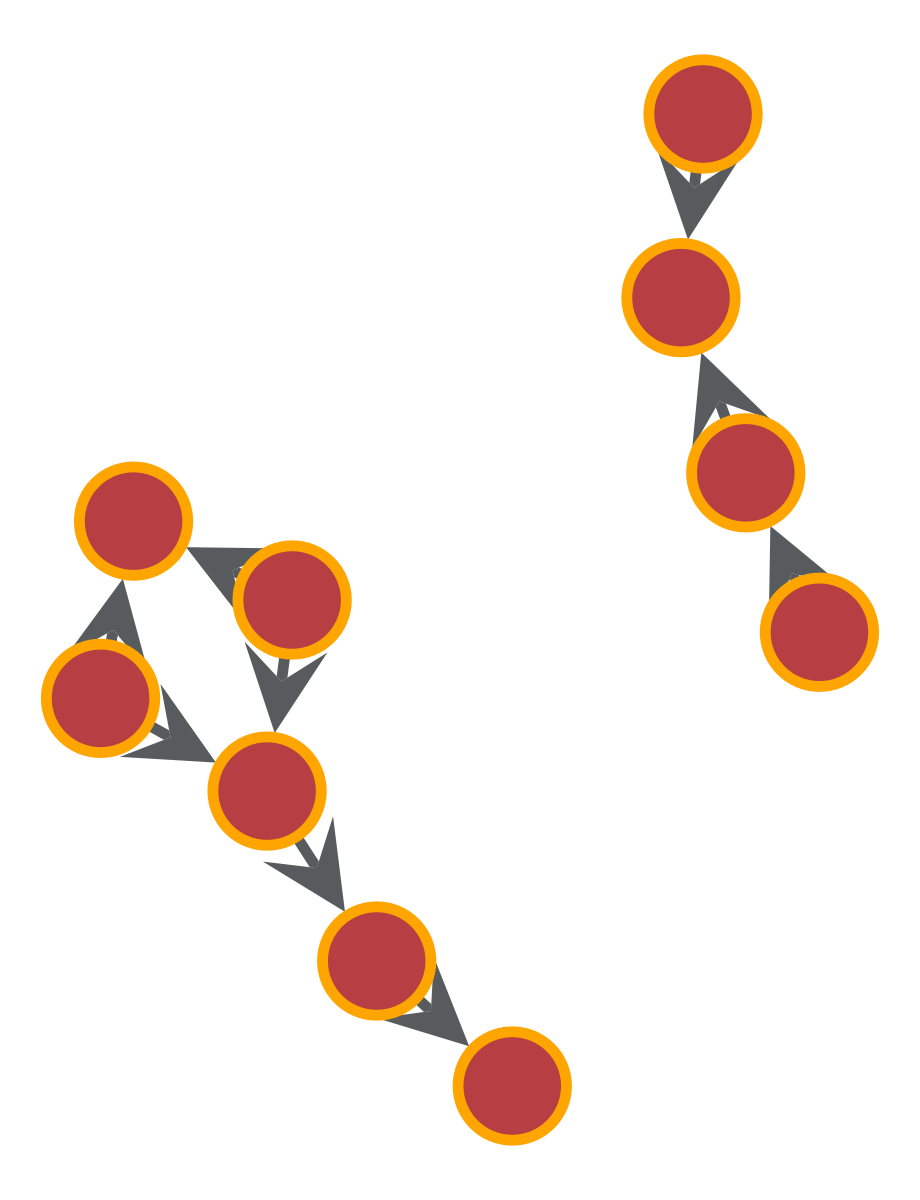

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x178727980, at 0x1785380e0>

In [62]:
graph_draw(network.graph, vertex_color='orange')

<VertexPropertyMap object with value type 'string', for Graph 0x178727980, at 0x178c3fe60>


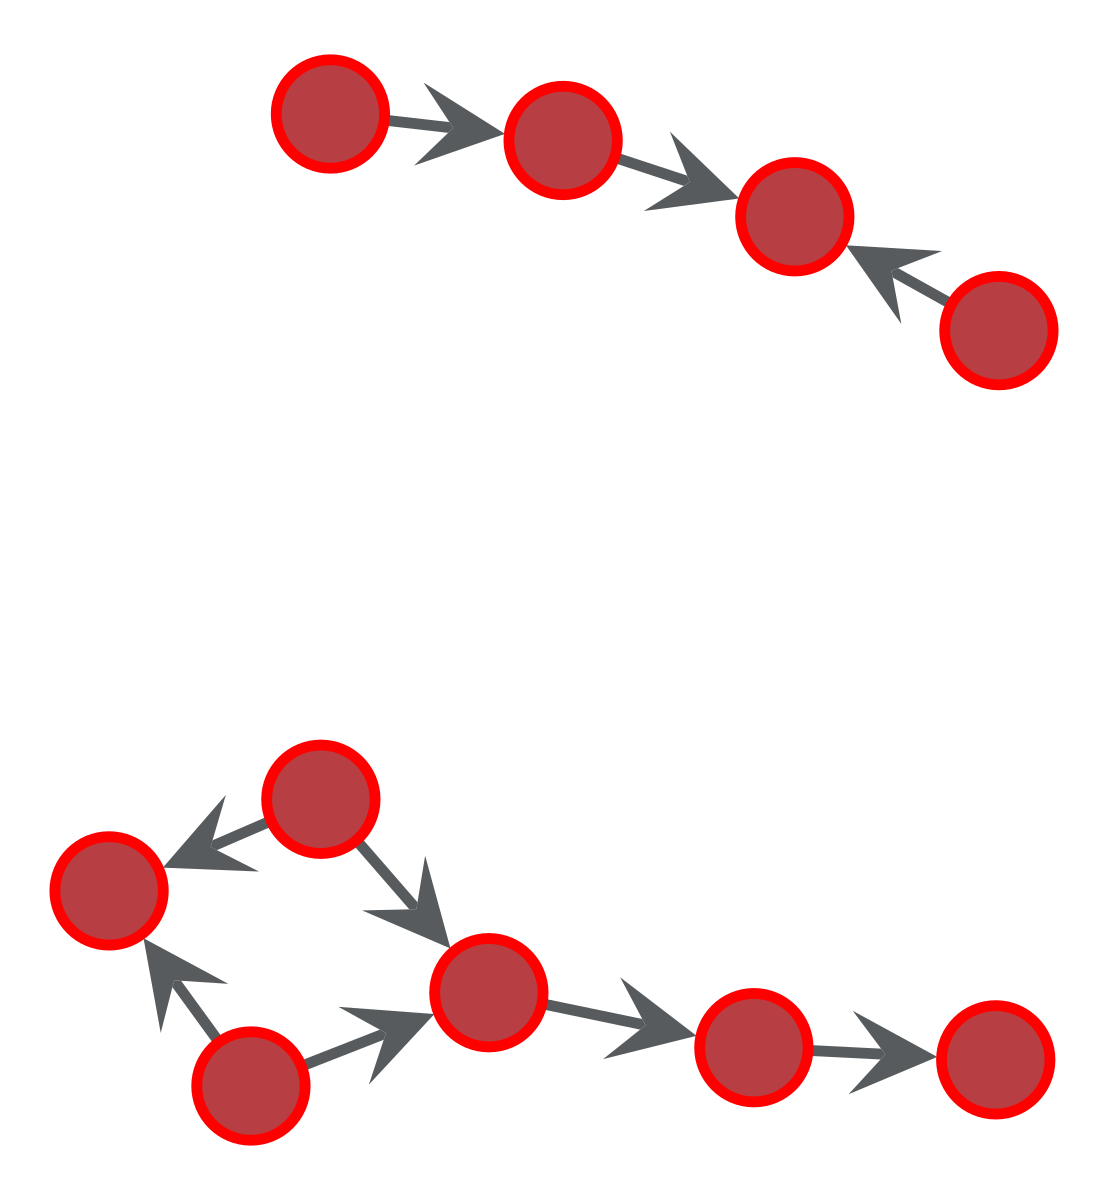

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x178727980, at 0x107dca420>

In [63]:
graph_draw(network.graph, vertex_color=word(network.graph.vp['layer']))